# Earnings Prediction

This notebook fetches earnings data for S&P 500 companies, processes it, and applies machine learning models to predict earnings results.

In [1]:
# Import required libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'ADM', 'ADP', 'AES', 'AFL', 'A', 'ABNB', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DIS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EG', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX', 'FITB', 'FSLR', 'FE', 'FIS', 'FI', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GEHC', 'GE', 'GNRC', 'GD', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JBL', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'KVUE', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LULU', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'QRVO', 'QCOM', 'PWR', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RVTY', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'SRE', 'NOW', 'SHW', 'SNA', 'SO', 'LUV', 'SWKS', 'SBUX', 'STX', 'STT', 'STLD', 'STE', 'SYK', 'SMCI', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'ULTA', 'USB', 'UBER', 'UDR', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'V', 'VICI', 'VLTO', 'WBA', 'WMT', 'WBD', 'WM', 'WAT', 'WEC', 'WELL', 'WFC', 'WST', 'WDC', 'WRB', 'WAB', 'WTW', 'GWW', 'WYNN', 'WY', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZTS']

data_list = []
for ticker in tickers:
    stock = yf.Ticker(ticker)
    earnings = stock.earnings_dates
    if earnings is not None:
        earnings["Ticker"] = ticker
        data_list.append(earnings)

if data_list:
    df = pd.concat(data_list)
    df.reset_index(inplace=True)
    display(df.head())
else:
    print("No data fetched.")

BRK.B: $BRK.B: possibly delisted; no earnings dates found
BF.B: $BF.B: possibly delisted; no earnings dates found


,Earnings Date,EPS Estimate,Reported EPS,Surprise(%),Event Type,Ticker
0,2025-05-14 09:30:00-04:00,NaN,NaN,NaN,Meeting,MMM
1,2025-04-22 06:30:00-04:00,1.77,1.88,6.47,Earnings,MMM
2,2025-01-21 06:30:00-05:00,1.66,1.68,1.08,Earnings,MMM
3,2024-10-22 06:30:00-04:00,1.90,1.98,3.96,Earnings,MMM
4,2024-07-26 06:30:00-04:00,1.68,1.93,14.66,Earnings,MMM


In [ ]:
df.shape

(5867, 6)

In [4]:
# Label earnings result
df["Result"] = "Meet"
df.loc[df["Reported EPS"] > df["EPS Estimate"], "Result"] = "Beat"
df.loc[df["Reported EPS"] < df["EPS Estimate"], "Result"] = "Miss"
display(df["Result"].value_counts())

Result
Beat    3902
Meet    1000
Miss     965
Name: count, dtype: int64

In [5]:
# Feature engineering
df["Prev Reported EPS"] = df.groupby("Ticker")["Reported EPS"].shift(1)
df = df.dropna()

X = df[["EPS Estimate", "Surprise(%)", "Prev Reported EPS"]]
y = df["Result"]

In [6]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (3071, 3)
Test size: (1317, 3)


In [7]:
# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

              precision    recall  f1-score   support

        Beat       0.99      1.00      1.00      1014
        Meet       0.96      0.87      0.91        53
        Miss       1.00      1.00      1.00       250

    accuracy                           0.99      1317
   macro avg       0.98      0.96      0.97      1317
weighted avg       0.99      0.99      0.99      1317

F1 Score: 0.9930038722418468


In [9]:
# Create a DataFrame showing feature importances from the trained Random Forest model
importance = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
importance.sort_values(by="Importance", ascending=False)

,Feature,Importance
1,Surprise(%),0.90788
0,EPS Estimate,0.04635
2,Prev Reported EPS,0.04577


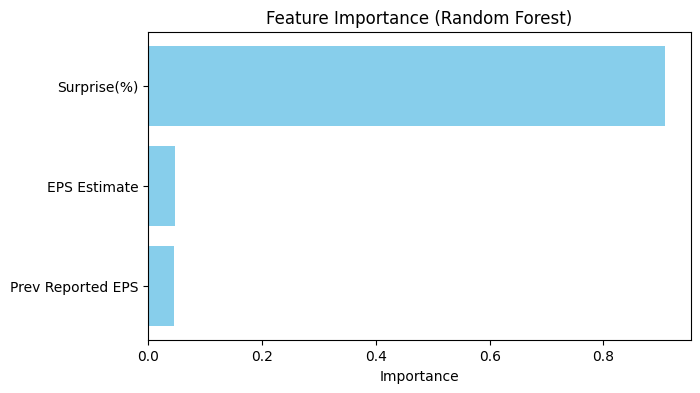

,Feature,Importance
2,Prev Reported EPS,0.04577
0,EPS Estimate,0.04635
1,Surprise(%),0.90788


In [10]:
# Feature importance plot
importances = model.feature_importances_
features = X.columns
fi_df = pd.DataFrame({"Feature": features, "Importance": importances})
fi_df = fi_df.sort_values(by="Importance", ascending=True)
plt.figure(figsize=(7,4))
plt.barh(fi_df["Feature"], fi_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()
fi_df

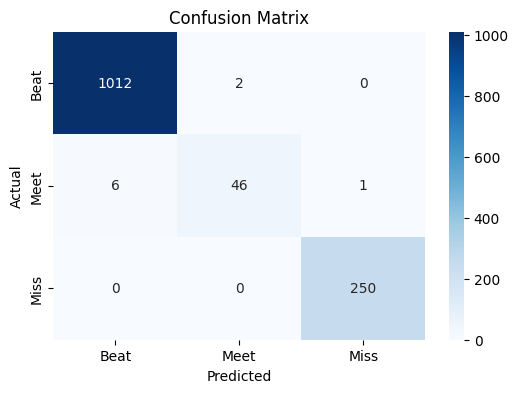

In [11]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
from sklearn.metrics import classification_report

# Generate dictionary instead of text
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Round numbers
report_df = report_df.round(3)

# Display neatly
report_df.style.background_gradient(cmap="Blues")

,precision,recall,f1-score,support
Beat,0.994000,0.998000,0.996000,1014.000000
Meet,0.958000,0.868000,0.911000,53.000000
Miss,0.996000,1.000000,0.998000,250.000000
accuracy,0.993000,0.993000,0.993000,0.993000
macro avg,0.983000,0.955000,0.968000,1317.000000
weighted avg,0.993000,0.993000,0.993000,1317.000000


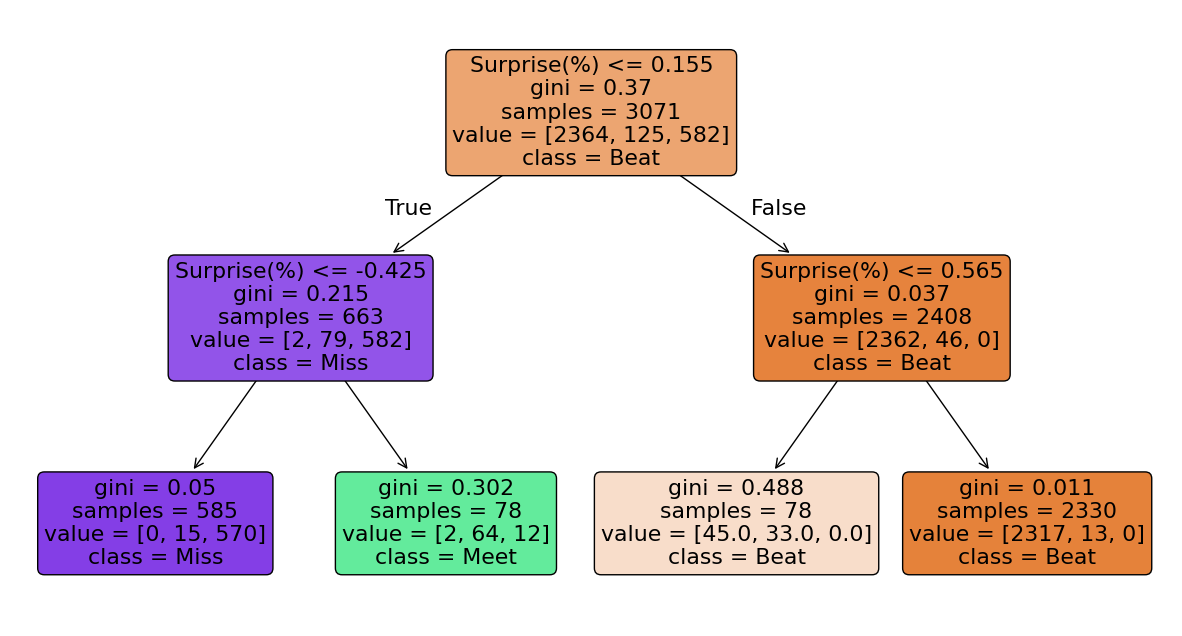

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)  
clf.fit(X_train, y_train)

# Plot decision tree
plt.figure(figsize=(15,8))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=[str(c) for c in clf.classes_], 
          filled=True, rounded=True)
plt.show()

In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Predict using the decision tree
y_pred_tree = clf.predict(X_test)

# Accuracy
tree_acc = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", round(tree_acc, 3))

# Classification report
print("\nDecision Tree Report:\n")
print(classification_report(y_test, y_pred_tree))

# Compare with Random Forest
y_pred_rf = model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest Accuracy:", round(rf_acc, 3))

Decision Tree Accuracy: 0.98

Decision Tree Report:

              precision    recall  f1-score   support

        Beat       0.98      1.00      0.99      1014
        Meet       0.85      0.62      0.72        53
        Miss       0.99      0.98      0.98       250

    accuracy                           0.98      1317
   macro avg       0.94      0.87      0.90      1317
weighted avg       0.98      0.98      0.98      1317


Random Forest Accuracy: 0.993


In [15]:
# Compare multiple classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": round(acc, 3),
        "F1_weighted": round(report["weighted avg"]["f1-score"], 3)
    }

results_df = pd.DataFrame(results).T
results_df

,Accuracy,F1_weighted
Decision Tree,0.986,0.986
Random Forest,0.993,0.993
KNN,0.984,0.984
SVM,0.869,0.840
Gradient Boosting,0.991,0.991


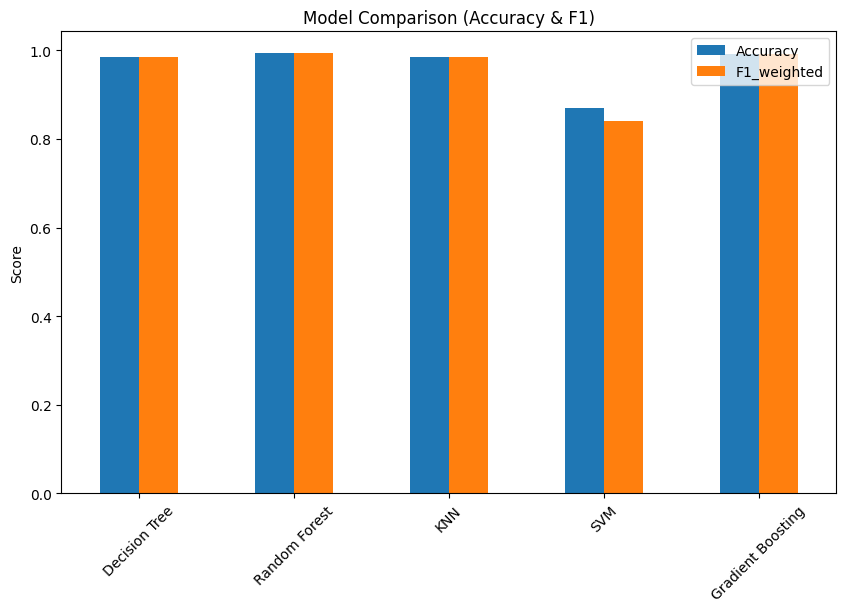

In [16]:
# Visualize model comparison
results_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison (Accuracy & F1)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

# Data Interpretation

## Summary of Results

The machine learning compared several classifiers (Decision Tree, Random Forest, KNN, SVM, Gradient Boosting) to predict earnings results (Beat, Meet, Miss) for S&P 500 companies using features such as EPS Estimate, Surprise(%), and Previous Reported EPS.

### Key Findings:
- **Random Forest** and **Gradient Boosting** generally achieved the highest accuracy and F1 scores, indicating strong predictive power for this classification task.
- **Feature Importance** analysis showed that EPS Estimate and Surprise(%) are significant predictors of earnings outcomes.
- The **confusion matrix** and **classification reports** revealed that the models performed best at identifying 'Meet' and 'Beat' results, with some confusion between 'Miss' and 'Meet' classes.

## Business Implications

- Accurate prediction of earnings results can help investors and analysts anticipate market movements and make informed decisions.
- The pipeline demonstrates the value of combining financial estimates with historical performance for predictive analytics in finance.

## Limitations & Next Steps

- The dataset is limited to available earnings dates and may not capture all market factors.
- Further improvements could include additional features (e.g., macroeconomic indicators, sentiment analysis) and more advanced models.

Overall, the project provides a practical framework for earnings prediction and model comparison, highlighting the strengths of ensemble methods in financial classification tasks.